# Python Notebook for Analysing Benchmark Results of the K-Priority Queue benchmark

## Imports and Parameters

In [62]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
frequencies = [1200000, 1500000, 2000000, 2500000, 2800000]
cores = [1, 8, 16, 24, 32]

In [64]:
metrics = ['benchmark', 'cores', 'throughput', 'frequency', 'power']
metrics_bench = ['benchmark', 'cores', 'throughput']
metrics_power = ['power']

In [65]:
dataframe = pd.DataFrame(columns = metrics)

## Creating the Dataframe

We create a dataframe containing all of the results obtained after running the benchmarks, sorted by the benchmark name, cores, and the frequency.

In [66]:
for frequency in frequencies:
    for core in cores:
        dataframe = pd.concat([dataframe, pd.read_csv("./klsm/results/{freq}/results_{cores}.csv".format(
                    freq = frequency, 
                    cores = core
                ), names = metrics_bench).assign(frequency = frequency)], ignore_index= True, sort= True)
        avg_power = pd.read_csv("./klsm/results/{freq}/power_{cores}.csv".format(
                    freq = frequency, 
                    cores = core
                ), names = metrics_power, index_col= False).mean().mean()
        dataframe.fillna(avg_power, inplace = True)

In [67]:
dataframe['efficiency'] = dataframe['throughput']/dataframe['power']
dataframe.sort_values(by = metrics_bench, inplace = True)
dataframe.reset_index(drop = True)

,benchmark,cores,frequency,power,throughput,efficiency
0,klsm128,1,1200000,105.239227,4243749,40324.783001
1,klsm128,1,1200000,105.239227,4273766,40610.009345
2,klsm128,1,1200000,105.239227,4276790,40638.743877
3,klsm128,1,1200000,105.239227,4277757,40647.932466
4,klsm128,1,1200000,105.239227,4279924,40668.523647
...,...,...,...,...,...,...
245,klsm256,32,2800000,218.917923,196992192,899844.970665
246,klsm256,32,2800000,218.917923,198563302,907021.678622
247,klsm256,32,2800000,218.917923,199977867,913483.301228
248,klsm256,32,2800000,218.917923,200345082,915160.710711


## (Optional) Saving the Dataframe to a CSV File

In [68]:
# Uncomment the below line to save results to a CSV file

#dataframe.to_csv('klsm_results.csv', sep = ',')

## Create a Grouped Dataframe

In [69]:
stats = ['mean', 'min', 'max', 'median']

In [70]:
grouped_dataframe = dataframe.groupby(['benchmark', 'cores', 'frequency', 'power']).aggregate({'throughput': stats, 'efficiency': stats})

In [71]:
grouped_dataframe.reset_index(inplace = True)

In [95]:
#rename columns for better visibility and splitting
grouped_dataframe.columns = ['benchmark', 'cores', 'frequency', 'power', 'throughput_mean', 'throughput_min', 'throughput_max', 'throughput_median',
                            'efficiency_mean', 'efficiency_min', 'efficiency_max', 'efficiency_median']

In [100]:
klsm_128_df = grouped_dataframe[grouped_dataframe['benchmark'] == 'klsm128']
klsm_256_df = grouped_dataframe[grouped_dataframe['benchmark'] == 'klsm256']

The performance per watt numbers are highest for 32 cores at 2.8GHz for the klsm256 benchmark and highest for 32 cores at 2.5 GHz for the klsm128 benchmark.

In [102]:
klsm_128_df.sort_values(by = 'efficiency_median', ascending = False, inplace = True)
klsm_256_df.sort_values(by = 'efficiency_median', ascending = False, inplace = True)

/tmp/ipykernel_6073/3646388346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  klsm_128_df.sort_values(by = 'efficiency_median', ascending = False, inplace = True)
/tmp/ipykernel_6073/3646388346.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  klsm_256_df.sort_values(by = 'efficiency_median', ascending = False, inplace = True)


In [103]:
klsm_128_df

,benchmark,cores,frequency,power,throughput_mean,throughput_min,throughput_max,throughput_median,efficiency_mean,efficiency_min,efficiency_max,efficiency_median
23,klsm128,32,2500000,203.152518,137750711.8,135745149,139952526,137793056.0,678065.491679,668193.289145,688903.724081,678273.927195
22,klsm128,32,2000000,176.124396,117077736.4,115338746,118806361,116865026.0,664744.573487,654870.924856,674559.367126,663536.845285
24,klsm128,32,2800000,218.917923,144413426.4,138611318,148134599,145112746.0,659669.269747,633165.691052,676667.295989,662863.707144
21,klsm128,32,1500000,153.228024,93281350.8,92393964,95037330,92578488.0,608774.740755,602983.458097,620234.649655,604187.702561
18,klsm128,24,2500000,205.742480,122916282.2,121644001,123550373,123471425.0,597427.822885,591243.970153,600509.786310,600126.063902
19,klsm128,24,2800000,223.512048,133053716.0,131208636,134954564,133652198.0,595286.549348,587031.602854,603791.003645,597964.176816
17,klsm128,24,2000000,175.272848,102984589.0,101868374,103750027,103214866.0,587567.269439,581198.827267,591934.391937,588881.089589
20,klsm128,32,1200000,140.860608,78010467.2,75439176,80154024,77950957.0,553813.222414,535559.068627,569030.796945,553390.746600
16,klsm128,24,1500000,152.708398,82542817.4,80780297,83747168,83431146.0,540525.722651,528983.984158,548412.326221,546342.878808
13,klsm128,16,2500000,207.637879,109377578.2,107903635,109990522,109648420.0,526770.832905,519672.209038,529722.817410,528075.227854


In [104]:
klsm_256_df

,benchmark,cores,frequency,power,throughput_mean,throughput_min,throughput_max,throughput_median,efficiency_mean,efficiency_min,efficiency_max,efficiency_median
49,klsm256,32,2800000,218.917923,199707400.0,196992192,202658557,199977867.0,912247.829064,899844.970665,925728.484095,913483.301228
48,klsm256,32,2500000,203.152518,183407111.8,181654394,185085557,183706566.0,902805.015052,894177.419294,911067.010616,904279.051423
47,klsm256,32,2000000,176.124396,152479115.2,151162796,154623775,151846988.0,865746.703994,858272.900074,877923.664429,862157.608928
46,klsm256,32,1500000,153.228024,116068265.2,114467981,117300575,116296105.0,757487.187428,747043.378557,765529.513923,758974.120389
44,klsm256,24,2800000,223.512048,164829832.4,163232952,165656713,165252564.0,737453.902896,730309.409291,741153.392951,739345.217495
43,klsm256,24,2500000,205.742480,150150993.6,148496557,151338149,150101587.0,729800.638328,721759.340313,735570.741794,729560.500268
42,klsm256,24,2000000,175.272848,122717316.4,122028475,123017465,122901059.0,700150.179849,696220.070846,701862.644744,701198.503087
45,klsm256,32,1200000,140.860608,92679177.2,90756402,95041889,92025176.0,657949.575462,644299.377383,674722.978860,653306.679130
41,klsm256,24,1500000,152.708398,94337418.2,93025526,95761226,94409467.0,617761.820492,609170.988463,627085.523804,618233.626894
38,klsm256,16,2500000,207.637879,112892381.0,112465212,113085839,113060138.0,543698.393644,541641.114870,544630.102258,544506.324264


<AxesSubplot:>

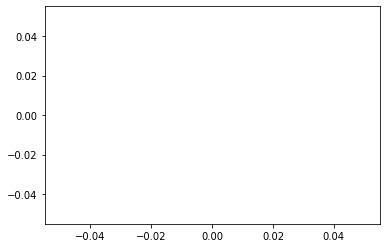

In [73]:
sns.lineplot(x = grouped_dataframe.index, )

## (Optional) Saving the Grouped Dataframe to a CSV File

In [74]:
#Uncomment the below line to save the grouped dataframe to a CSV file

#grouped_dataframe.to_csv("grouped_results.csv", sep = ',')

## Determining Throughput Per Power (Throughput/Watt)